Imports

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.applications import ResNet50
import numpy as np
import matplotlib.pyplot as plt

from models import models

from sklearn import metrics

import os

Dataset Configuration

In [2]:
batch_size = 16


train_ds = tf.keras.utils.image_dataset_from_directory(
    os.getcwd() + '/Train',
    image_size=(128,128),
    batch_size=batch_size,
    label_mode = 'categorical'
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    os.getcwd() + '/Test',
    image_size=(128,128),
    batch_size=batch_size,
    label_mode = 'categorical'
)


Found 606 files belonging to 7 classes.
Found 203 files belonging to 7 classes.


In [3]:
num_classes = len(train_ds.class_names)


Dataset Visualization

['Coffee', 'Corn', 'Eucalyptus', 'Goiaba', 'Orange', 'Soybean', 'Tomato']


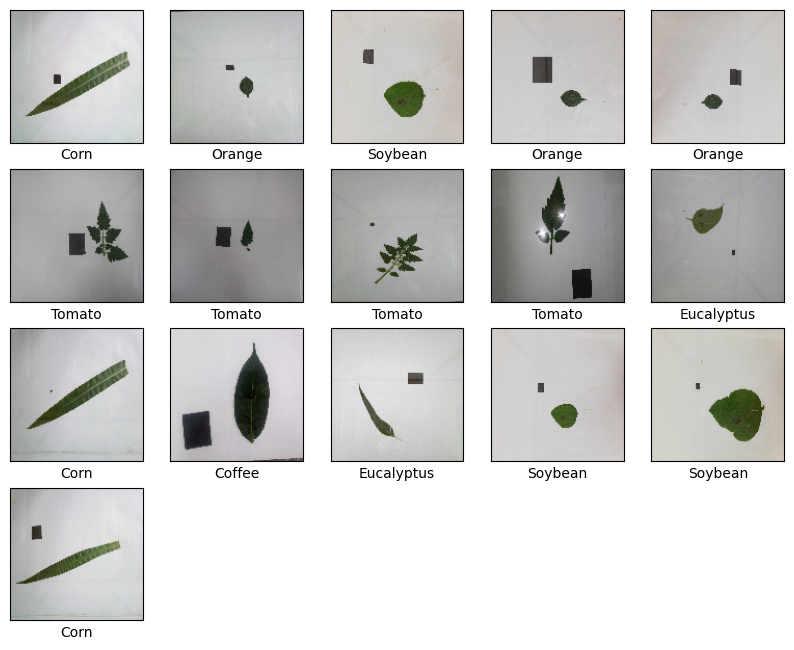

In [4]:
class_names = train_ds.class_names

print(class_names)

plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(16):
      plt.subplot(5,5,i+1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      plt.imshow(images[i].numpy().astype("uint8"))
      plt.xlabel(class_names[tf.math.argmax(labels[i])])
  plt.show()

Normalizing Dataset

In [5]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))

Model

In [6]:
model = models('alex')
# model = tf.keras.applications.ResNet50(
#     include_top=True,
#     weights=None,
#     input_tensor=None,
#     input_shape=(224,224,3),
#     pooling=None,
#     classes=num_classes
# )

if model is None:
    print("Model not found")
    exit()

model.compile(optimizer=SGD(learning_rate=1e-3),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

model.summary()

Model: "alex"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 6, 6, 384)      │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 6, 6, 384)      │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 6, 6, 256)      │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4096)           │     4,198,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │        28,679 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,755,591 (94.44 MB)

 Trainable params: 24,755,591 (94.44 MB)

 Non-trainable params: 0 (0.00 B)

TRAINING

In [7]:
history = model.fit(train_ds, epochs=80)

train_acc = history.history["accuracy"]
train_loss = history.history["loss"]


Epoch 1/80
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - accuracy: 0.1745 - loss: 10.2182
Epoch 2/80
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - accuracy: 0.1855 - loss: 1.9521
Epoch 3/80
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - accuracy: 0.1686 - loss: 1.9221
Epoch 4/80
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - accuracy: 0.1888 - loss: 1.8880
Epoch 5/80
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - accuracy: 0.1702 - loss: 1.9015
Epoch 6/80
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step - accuracy: 0.1693 - loss: 1.8611
Epoch 7/80
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step - accuracy: 0.1923 - loss: 1.8269
Epoch 8/80
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - accuracy: 0.1919 - loss: 1.7832
Epoch 9/80
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - accuracy: 0.1943 - loss: 1.7778
Epoch 10/80
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step - accuracy: 0.2220 - loss: 1.7509
Epoch 11/80
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - accuracy: 0.2910 - loss: 1.7322
Epoch 12/80
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/ste

Testing

In [11]:
test_loss, test_acc = model.evaluate(test_ds, verbose=1)

print('\nTest accuracy:', test_acc)

# write loss and accuracy to file
f = open("output/acc_loss.txt", "a")
f.write(model.name + " " + str(test_loss) + " ")
# write accuracy for each class
# acc_coffee, acc_corn, acc_eucalyptus, acc_goiaba, acc_orange, acc_soybean, acc_tomato

# find each class accuracy
y_pred = model.predict(test_ds)
y_pred = np.argmax(y_pred, axis=1)
y_true = []
for _, labels in test_ds:
    for label in labels:
        y_true.append(tf.math.argmax(label).numpy())
y_true = np.array(y_true)

def class_accuracy(y_true, y_pred, class_label):
    indices = y_true == class_label
    return metrics.accuracy_score(y_true[indices], y_pred[indices])

acc_coffee = class_accuracy(y_true, y_pred, 0)
acc_corn = class_accuracy(y_true, y_pred, 1)
acc_eucalyptus = class_accuracy(y_true, y_pred, 2)
acc_goiaba = class_accuracy(y_true, y_pred, 3)
acc_orange = class_accuracy(y_true, y_pred, 4)
acc_soybean = class_accuracy(y_true, y_pred, 5)
acc_tomato = class_accuracy(y_true, y_pred, 6)

print(f"Acc Coffee: {acc_coffee}")
print(f"Acc Corn: {acc_corn}")
print(f"Acc Eucalyptus: {acc_eucalyptus}")
print(f"Acc Goiaba: {acc_goiaba}")
print(f"Acc Orange: {acc_orange}")
print(f"Acc Soybean: {acc_soybean}")
print(f"Acc Tomato: {acc_tomato}")

# f.write(str(acc_coffee) + " " + str(acc_corn) + " " + str(acc_eucalyptus) + " " + str(acc_goiaba) + " " + str(acc_orange) + " " + str(acc_soybean) + " " + str(acc_tomato) + " ")


f.write(str(test_acc) + "\n")
f.close()

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.6164 - loss: 1.9376

Test accuracy: 0.6453201770782471
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step
Acc Coffee: 0.05555555555555555
Acc Corn: 0.1875
Acc Eucalyptus: 0.09375
Acc Goiaba: 0.0
Acc Orange: 0.0
Acc Soybean: 0.11904761904761904
Acc Tomato: 0.25


Plotting

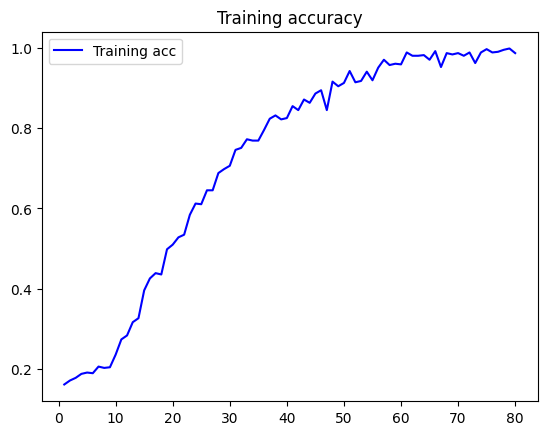

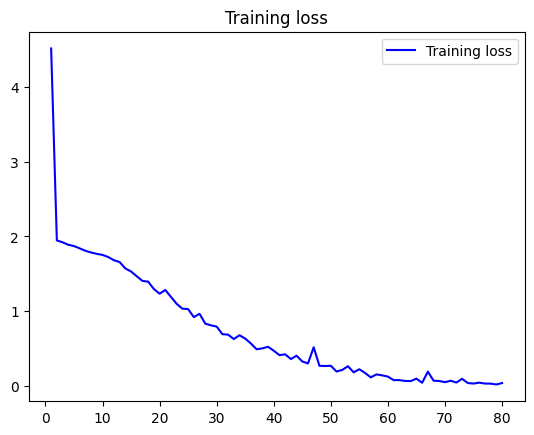

In [9]:
epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, 'b', label='Training acc')
plt.title('Training accuracy')
plt.legend()
plt.savefig("output/" + model.name + "_acc.png")
plt.figure()

plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.title('Training loss')
plt.legend()
plt.savefig("output/" + model.name + "_loss.png")

plt.show()

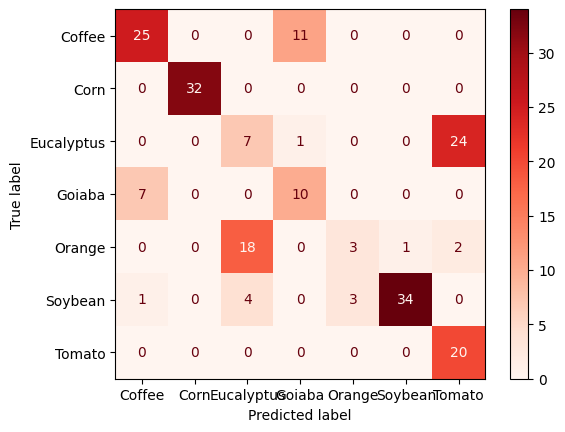

In [10]:
# probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
# predictions = probability_model.predict(test_ds)

predictions = np.array([])
labels =  np.array([])
for x, y in test_ds:
  predictions = np.concatenate([predictions, np.argmax(model.predict(x, verbose=0), axis = -1)])
  labels = np.concatenate([labels, np.argmax(y.numpy(), axis=-1)])


# confusion matrix
confusion_matrix = metrics.confusion_matrix(labels, predictions)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix, display_labels=class_names).plot(cmap=plt.cm.Reds)

cm_display.figure_.savefig("output/" + model.name + "_confusion_matrix.png")